# Solving the world food shortage problem through Data Storytelling
The project involves the use of many visualisations accompanied by narratives to tell a story making it easy to understand the problem (world food shortage) and how the problem can be solved.


    
### Information about the datasets:
- Africa food production dataset: the data contains information about the quantity (kt) of food produced in 45 African            countries between 2004 and 2013 inclusive. It consists of 23110 rows and 4 columns. The columns in the dataset are :            Country, Year, Item and Value.

- Africa food supply dataset: the data contains information about the quantity (kt) of food produced in 45 African            countries between 2004 and 2013 inclusive. It consists of 450 rows and 3 columns. The columns in the dataset are :            Country, Year and Value.
    
### Steps in undertaking the Project:
- Load datasets
- Exploratory Data Analysis
- Data Visualization and Storytelling
- Conclusion and Recommendation       - 

---

## Load Datasets

In [133]:
#Import necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import plotly.express as px
from plotly.offline import plot

### A) African food production dataset.

In [134]:
#Read African food production dataset
#url = 'C:/Users/Ganiyat Omotola/Desktop/Hamoye DS Internship/Stage C/df_production.csv'
url = 'https://www.wolframcloud.com/obj/mar/Hamoye/Session%202/Data/Africa%20Food%20Production%20(2004%20-%202013).csv'
production_df = pd.read_csv(url, error_bad_lines=False)
#change the name of the Value column to Quantity [kt]
production_df.rename(columns={'Value':'Value [kt]'},inplace=True)
production_df.head()

,Country,Item,Year,Value [kt]
0,Algeria,Wheat and products,2004,2731
1,Algeria,Wheat and products,2005,2415
2,Algeria,Wheat and products,2006,2688
3,Algeria,Wheat and products,2007,2319
4,Algeria,Wheat and products,2008,1111


### B) African food consumption (supply) dataset.

In [135]:
#Read African food supply dataset
#url = 'C:/Users/Ganiyat Omotola/Desktop/Hamoye DS Internship/Stage C/df_supply.csv'
url = 'https://www.wolframcloud.com/obj/mar/Hamoye/Session%202/Data/Africa%20Food%20Supply%20(2004%20-%202013).csv'
supply_df = pd.read_csv(url, error_bad_lines=False)
#change the name of the Value column to Quantity [kcal/(person day)] 
supply_df.rename(columns={'Value':'Value [kcal/(person day)]'}, inplace=True)
supply_df.head()

,Country,Year,Value [kcal/(person day)]
0,Algeria,2004,2987
1,Algeria,2005,2958
2,Algeria,2006,3047
3,Algeria,2007,3041
4,Algeria,2008,3048


### C) External World population dataset.
 The external world population dataset was used for analysing the two datasets for food production and consumption in Africa.

In [136]:
#Read External world population dataset
population_df = pd.read_csv('C:/Users/Ganiyat Omotola/Desktop/Hamoye DS Internship/Stage C/datasets/population_data.csv', skiprows=range(4))
population_df = population_df[['Country Name','Country Code','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013']]
#converting the years into a column
population_df = pd.melt(population_df, id_vars= ['Country Name','Country Code'], var_name='Year')
population_df.columns = ['Country','Code','Year','Population']
population_df.to_csv('population_df.csv')
world_population = population_df.drop(['Year'], axis=1)
world_population.head()

,Country,Code,Population
0,Aruba,ABW,98737.0
1,Afghanistan,AFG,24726684.0
2,Angola,AGO,18758145.0
3,Albania,ALB,3026939.0
4,Andorra,AND,76244.0


---

## Exploratory Data Analysis
The next step after loading the datasets is to perform EDA on the datasets using Statistical techniques.

### Data Preprocessing:
This is done before Data Analysis and Visualizations. It involves cleaning and transforming of Datasets.

In [137]:
#Check information about production dataset
production_df['Year'] = production_df['Year'].astype(str)
#production_df.info()

In [138]:
#check information about 
supply_df['Year'] = supply_df['Year'].astype(str)
#supply_df.info()

In [139]:
population_df['Year'] = population_df['Year'].astype(str)
#population_df.info()

### Grouping of African Food Production and Supply datasets for easy visualisations.

  #### a) Food Production Dataset.

Grouping by all variables based on similarity in observations

In [140]:
#Total quantity of items for the african countries in each year
totalProd_CY = production_df.groupby(['Country','Year'], as_index=False).sum()
totalProd_CY
#Average quantity of items for the african countries in each year
meanProd_CY = production_df.groupby(['Country','Year'], as_index=False).mean()
meanProd_CY
#Total quantity of food items for each year
totalProd_IY = production_df.groupby(['Item','Year'],as_index=False).sum()
totalProd_IY
#Average quantity of food items for each year
meanProd_IY = production_df.groupby(['Item','Year'],as_index=False).mean()
meanProd_IY
#Total quantity of food items for each year
totalProd_CI = production_df.groupby(['Country','Item'], as_index=False).sum()
totalProd_CI
#Average quantity of food items for each year
meanProd_CI = production_df.groupby(['Country','Item'], as_index=False).mean()
meanProd_CI
#Total quantity of food items
totalProd_I = production_df.groupby('Item', as_index=False).sum()
totalProd_I
#Average quantity of food items
meanProd_I = production_df.groupby('Item', as_index=False).mean()
meanProd_I
#Total quantity of food items by country
totalProd_C = production_df.groupby('Country', as_index=False).sum()
totalProd_C
#Average quantity of food items by country
meanProd_C = production_df.groupby('Country', as_index=False).mean()
meanProd_C
#Total quantity of food items by year
totalProd_Y = production_df.groupby('Year', as_index=False).sum()
totalProd_Y
#Average quantity of food items by year
meanProd_Y = production_df.groupby('Year', as_index=False).mean()
meanProd_Y

,Year,Value [kt]
0,2004,286.767301
1,2005,298.986592
2,2006,310.814014
3,2007,305.215830
4,2008,318.686851
5,2009,323.040657
6,2010,340.166955
7,2011,351.303633
8,2012,364.831816
9,2013,378.227568


  #### a) Food Supply Dataset.

Grouping by Country and Year

In [141]:
meanSupp_CY = supply_df.groupby(['Country','Year'],as_index=False).mean()
meanSupp_CY
#Total food items supplied by Country
totalSupp_C = supply_df.groupby('Country', as_index=False).sum()
totalSupp_C.head()
#Average food items supplied by Country
meanSupp_C = supply_df.groupby('Country', as_index=False).mean()
meanSupp_C.head()
#Total food items supplied by Year
totalSupp_Y = supply_df.groupby('Year', as_index=False).sum()
totalSupp_Y.head()
#Average food items supplied by Year
meanSupp_Y = supply_df.groupby('Year', as_index=False).mean()
#meanSupp_Y.head()
totalSupp_C.head()

,Country,Value [kcal/(person day)]
0,Algeria,31118
1,Angola,22556
2,Benin,25378
3,Botswana,22263
4,Burkina Faso,26072


### Ordering the production data (Top 20 and Bottom 20)

In [142]:
#Sort values by country to get the top 20 countries with most food production
prodByC_orderedT = totalProd_C.sort_values('Value [kt]', ascending=False, axis = 0)
prodByC_top20 = prodByC_orderedT.head(20)
#Sort values by country to get the bottom 20 countries with most food production
prodByC_orderedB = totalProd_C.sort_values('Value [kt]', axis = 0).head(20)
prodByC_bottom20 = prodByC_orderedB.head(20)
#Sort values to get the top 20 items  mostly  produced
prodByI_orderedT = totalProd_I.sort_values('Value [kt]', ascending=False, axis = 0).head(20)
prodByI_top20 = prodByI_orderedT.head(20)
#Sort values to get the bottom 20 items  mostly  produced
prodByI_orderedB = totalProd_I.sort_values('Value [kt]', axis = 0).head(20)
prodByI_bottom20 = prodByI_orderedB.head(20)
#prodByI_bottom20
#prodByI_bottom20.Item.values

### Ordering the supply data (Top 20 and Bottom 20)

In [143]:
#Sort values by country to get the top 20 countries with most food supply
suppByC_top20 = totalSupp_C.sort_values('Value [kcal/(person day)]', ascending=False, axis = 0).head(20)
suppByC_top20.head()
suppByC_bottom20 = totalSupp_C.sort_values('Value [kcal/(person day)]', ascending=True, axis = 0).head(20)
#suppByC_bottom20
#suppByC_bottom20.Country.values

### Convert the values for supply data to kT

In [144]:
supply_df.head(2)
newsupply_df = supply_df
newsupply_df['Value [kcal/(person day)]'] = newsupply_df['Value [kcal/(person day)]'] * 365
new_population = population_df.groupby(['Country','Year'],as_index=False).sum()

supply_population = newsupply_df.merge(new_population, on=['Country','Year'], how='left')
supply_population.head()
supply_population['Value [kcal]'] = supply_population['Value [kcal/(person day)]'] * supply_population['Population']
supply_population.drop(['Value [kcal/(person day)]','Population'], axis=1, inplace=True)
supply_population['Value [kt]'] = supply_population['Value [kcal]'] * (1.0006692160612e-9)
supply_population.drop(['Value [kcal]'], axis=1, inplace=True)
supply_population.head()
supplyBy_C = supply_population.groupby('Country', as_index=False).sum()
supplyBy_Y = supply_population.groupby('Year', as_index=False).sum()

### Combine the food production and supply datasets grouped by Year and Country

In [145]:
#Combine the food production and food supply datasets grouped by Year
totalPS_Y = totalProd_Y.merge(supplyBy_Y, on='Year')
totalPS_Y.columns =['Year','Quantity Produced','Quantity Supplied']
meanPS_Y = meanProd_Y.merge(meanSupp_Y, on='Year')
meanPS_Y.columns =['Year','Quantity Produced','Quantity Supplied']
#totalPC_Y
#totalProd_Y

In [146]:
#Combine the food production and food supply datasets grouped by Year
totalPS_C = totalProd_C.merge(supplyBy_C, on='Country')
totalPS_C.columns =['Country','Quantity Produced','Quantity Supplied']
meanPS_C = meanProd_C.merge(meanSupp_C, on='Country')
meanPS_C.columns =['Country','Quantity Produced','Quantity Supplied']
#totalPC_Y
#totalProd_Y

----

## Data Visualization and Data Storytelling

In [147]:
plt.style.use('ggplot')
sns.set(style='white') #to give the graph a particular design
plt.rc('figure', figsize=(16, 10))  # to make all the graph the same size

### Total Quantity produced and supplied

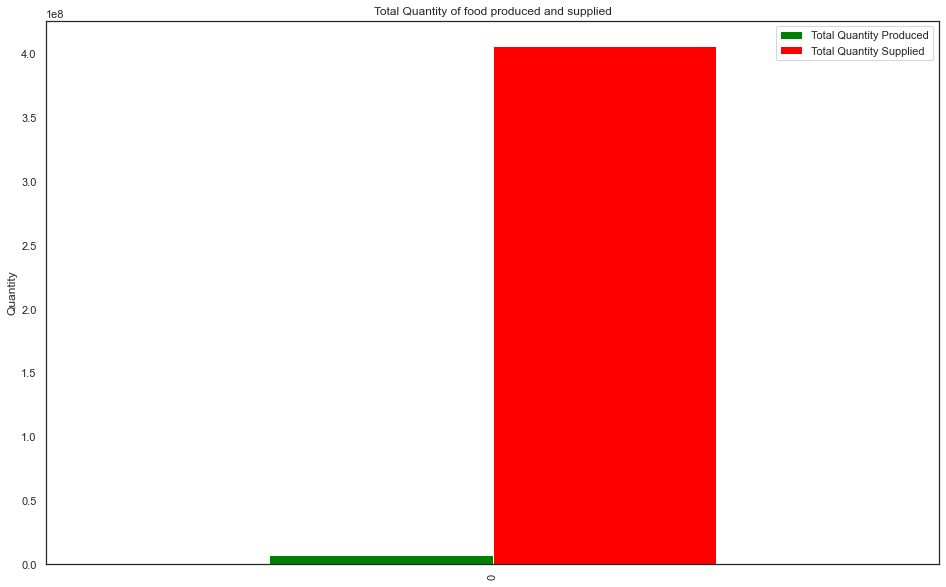

In [148]:
prodQuantity = production_df['Value [kt]'].sum()
prodQuantity
suppQuantity = supply_df['Value [kcal/(person day)]'].sum()
suppQuantity
total_dict = {'Total Quantity Produced': 7575116, 'Total Quantity Supplied': 405660635}
totalQuantity = pd.DataFrame(total_dict, index=[0])
totalQuantity.plot(kind='bar', color=['green','red'])
#plt.label('Nigeria', rotation=0)
plt.ylabel('Quantity')
#plt.rcParams['figure.figsize'] = (10, 5)
plt.title('Total Quantity of food produced and supplied')
plt.legend()
plt.show()

##### Narrative:
From the analysis, It was discovered that a total of 7,575,116 kiloTonnes of food items were produced in the African countries between the years 2004 to 2013 while a sum of 405,660,635 of food items were  consumed within these years.

### Top Countries based on quantity of food items produced

No handles with labels found to put in legend.


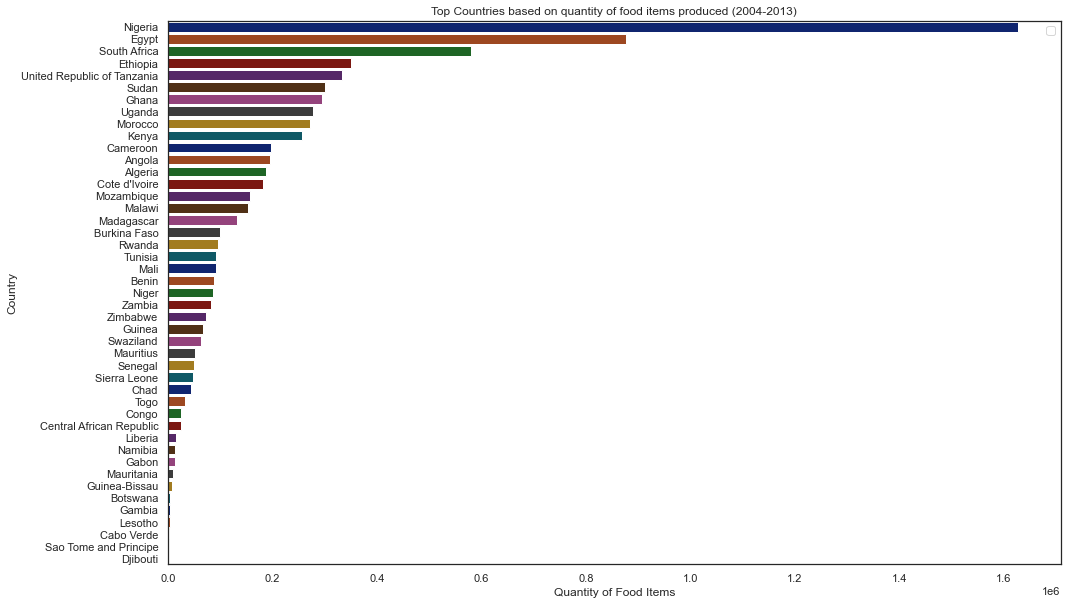

In [149]:
productionBy_C = totalProd_C.reset_index().set_index('Country').sort_values('Value [kt]',ascending=False)
sns.barplot(x='Value [kt]', y=productionBy_C.index, data=productionBy_C, palette='dark')
plt.ylabel('Country')
plt.xlabel('Quantity of Food Items')
#plt.rcParams['figure.figsize'] = (20, 10)
plt.title('Top Countries based on quantity of food items produced (2004-2013)')
plt.legend()
plt.show()

#### Narratives:
Nigeria produced the highest quantity of food items between years 2004 to 2013, followed by Egypt and then South Africa.

### Top 40 Food Items based on quantity produced

No handles with labels found to put in legend.


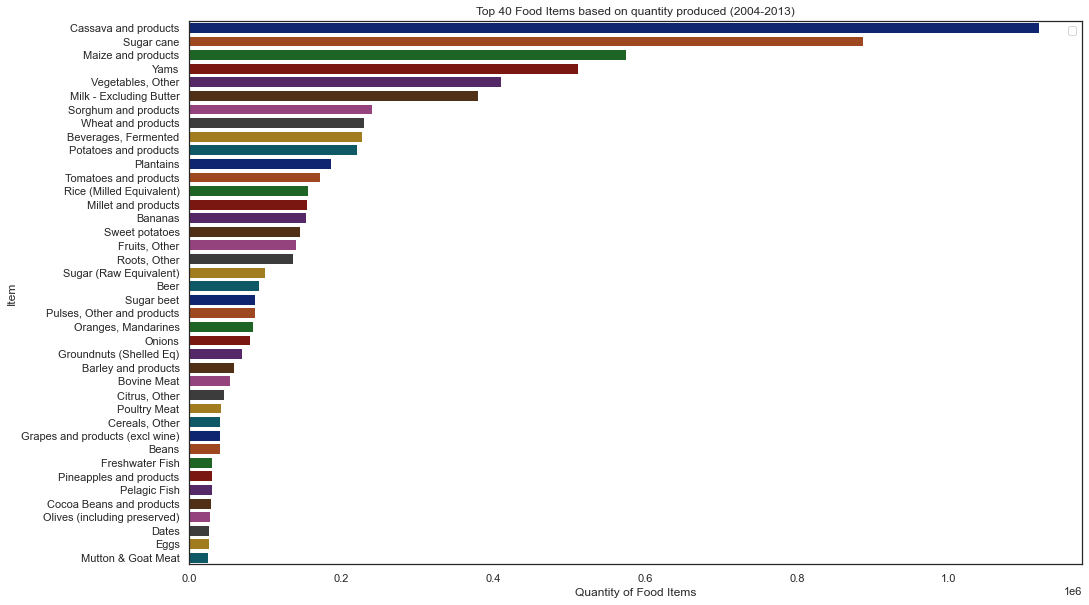

In [150]:
productionBy_I = totalProd_I.reset_index().set_index('Item').sort_values('Value [kt]',ascending=False).head(40)
sns.barplot(x='Value [kt]', y=productionBy_I.index, data=productionBy_I, palette='dark')
plt.ylabel('Item')
plt.xlabel('Quantity of Food Items')
#plt.rcParams['figure.figsize'] = (10, 5)
plt.title('Top 40 Food Items based on quantity produced (2004-2013)')
plt.legend()
plt.show()

#### Narratives:
"Cassava and products" was the most produced food item between the period 2004 to 2013, followed by "sugar cane" and then "maize and products".

### Bottom 40 Food Items based on quantity  produced

No handles with labels found to put in legend.


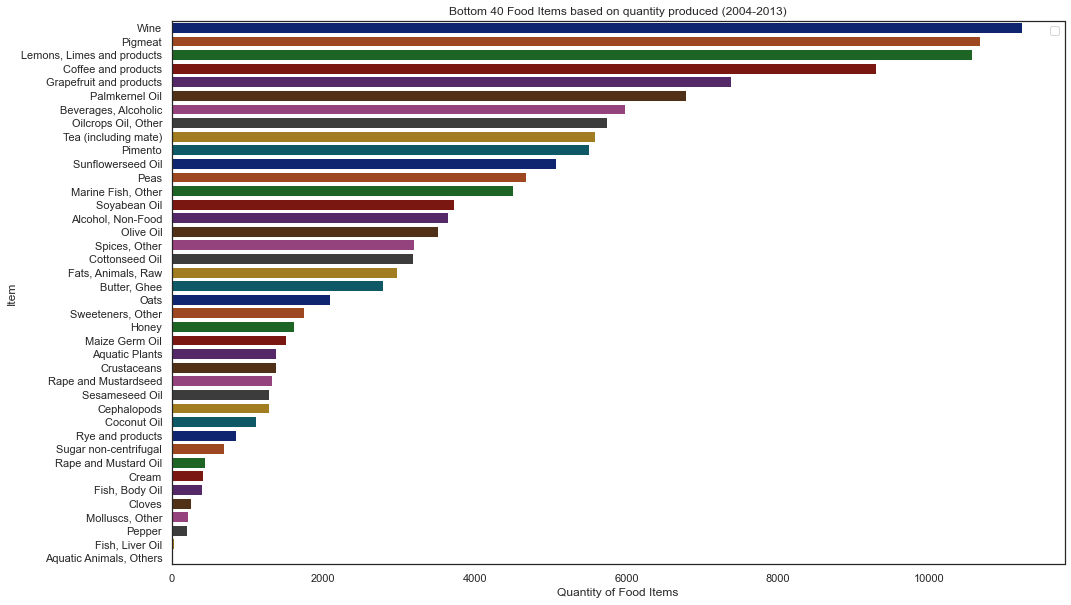

In [151]:
productionBy_I = totalProd_I.reset_index().set_index('Item').sort_values('Value [kt]',ascending=False).tail(40)
sns.barplot(x='Value [kt]', y=productionBy_I.index, data=productionBy_I, palette='dark')
plt.ylabel('Item')
plt.xlabel('Quantity of Food Items')
#plt.rcParams['figure.figsize'] = (10, 5)
plt.title('Bottom 40 Food Items based on quantity produced (2004-2013)')
plt.legend()
plt.show()

##### Narrative:
"Aquatic Animals, Others" was the least produced food item between 2004 to 2013 inclusive followed by "Fish, Liver Oil" and then "Pepper".

### Top Countries based on quantity of food items supplied

No handles with labels found to put in legend.


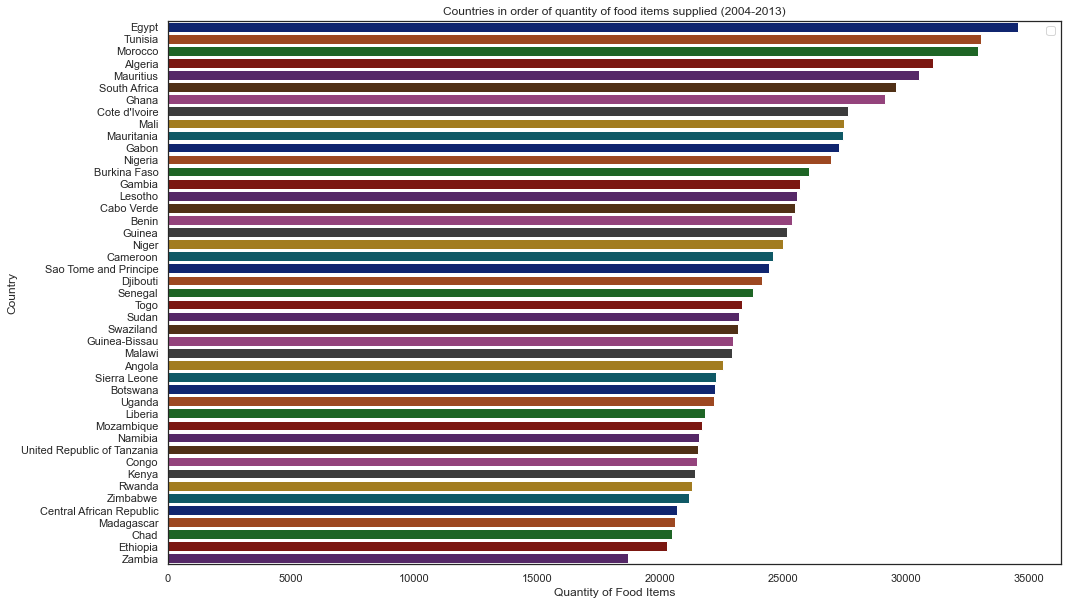

In [152]:
supplyBy_C = totalSupp_C.set_index('Country').sort_values('Value [kcal/(person day)]',ascending=False)
sns.barplot(x='Value [kcal/(person day)]', y=supplyBy_C.index, data=supplyBy_C, palette='dark')
plt.ylabel('Country')
plt.xlabel('Quantity of Food Items')
#plt.rcParams['figure.figsize'] = (10, 5)
plt.title('Countries in order of quantity of food items supplied (2004-2013)')
plt.legend()
plt.show()

#### Narrative:
Egypt produced the highest quantity of food items between the period 2004 to 2013 followed by Tunisia and then Morocco.

### Trend in Food Production over the years

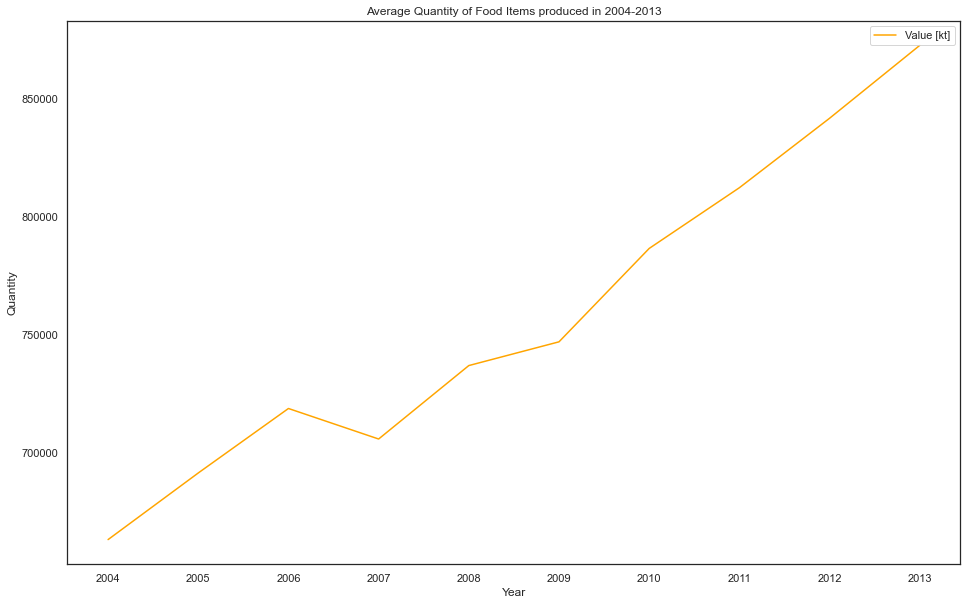

In [153]:
totalProd_Y.plot(kind='line',color='orange')
plt.title("Average Quantity of Food Items produced in 2004-2013")
plt.ylabel("Quantity")
plt.xlabel('Year')
plt.xticks(np.arange(10),['2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011','2012', '2013'])
plt.show()

##### Narrative: 
The quantity of food items produced between 2004 to 2013 increased each year in respect to previous year except in 2007 that there was a fall.

### Trend in Food Consumption over the years

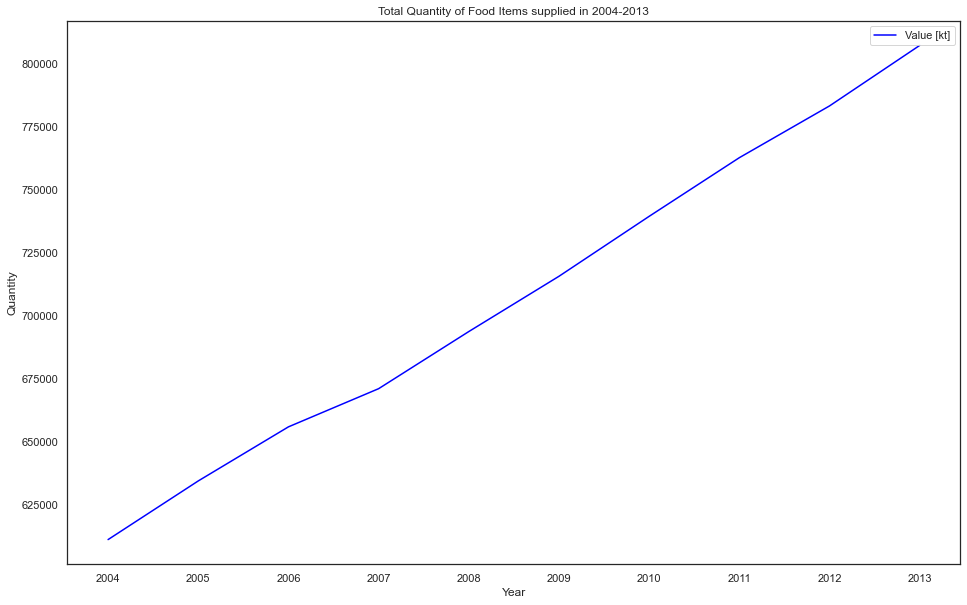

In [154]:
supplyBy_Y.plot(kind='line',color='blue')
plt.title("Total Quantity of Food Items supplied in 2004-2013")
plt.ylabel("Quantity")
plt.xlabel('Year')
plt.xticks(np.arange(10),['2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011','2012', '2013'])
plt.show()

##### Narrative: 
The quantity of food items supplied between 2004 to 2013 increased each year in respect to previous year. 

### Comparison between food production and consumption over the years

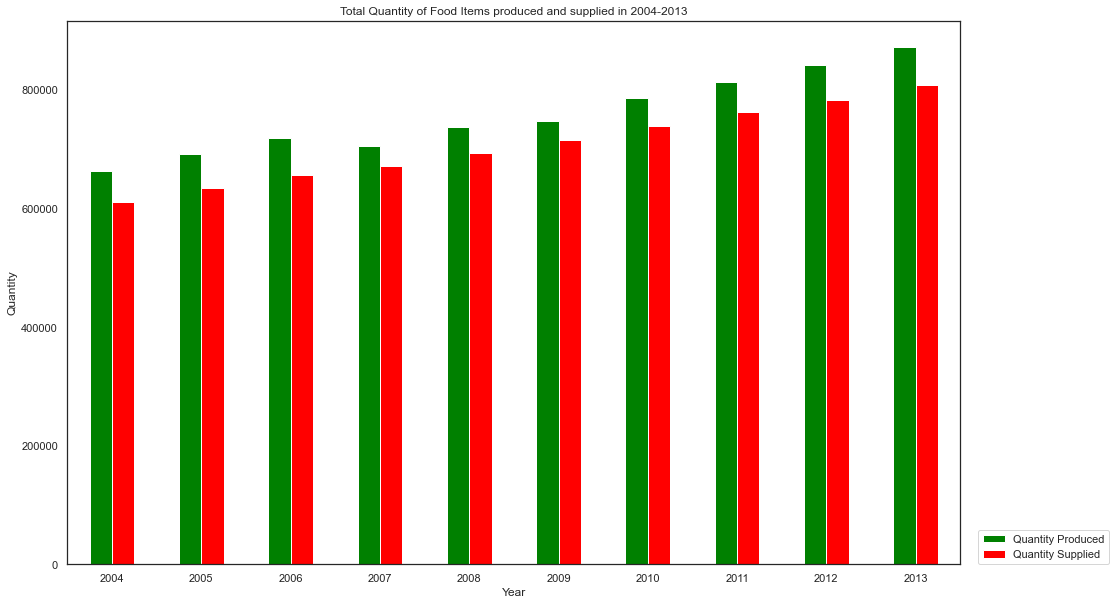

In [155]:
totalPS_Y.plot(kind='bar',color=['green','red'])
plt.title("Total Quantity of Food Items produced and supplied in 2004-2013")
plt.ylabel("Quantity")
plt.xlabel('Year')
#plt.yscale('log')
plt.xticks(np.arange(10),['2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011','2012', '2013'],rotation=0)
plt.legend(loc=(1.02,0))
plt.show()

##### Narrative:
There was significant difference in the quantity of food produced and quantity supplied across the year 2004 to 2013. Most food items produced were not supplied for consumption to the population in the African countries. 

### Detecting extreme quantity of food items over the years

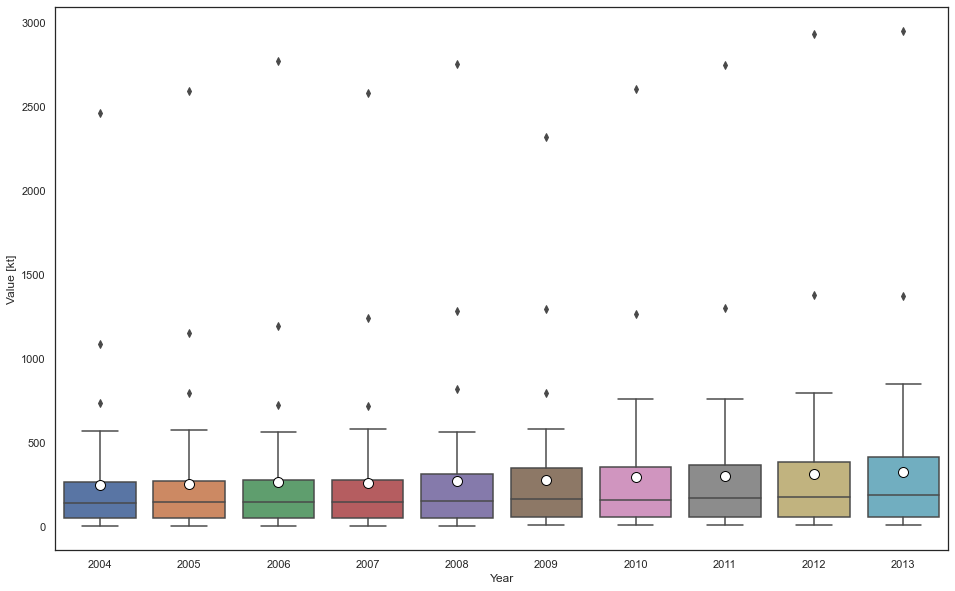

In [156]:
#For Production dataset
meanProd_Y.head()
sns.boxplot(x='Year', y='Value [kt]', data=meanProd_CY, showmeans=True, meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"})
#totalProd_Y.head()
Q1 = meanProd_CY['Value [kt]'].quantile(0.25)
Q3 = meanProd_CY['Value [kt]'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 
lower_fence = Q1 - (1.5 * IQR)
upper_fence = Q3 + (1.5 * IQR)
filter = (meanProd_CY['Value [kt]'] < lower_fence) | (meanProd_CY['Value [kt]'] > upper_fence)
#meanProd_CY.loc[filter]  

##### Narrative:
Some years had extreme values in food production.

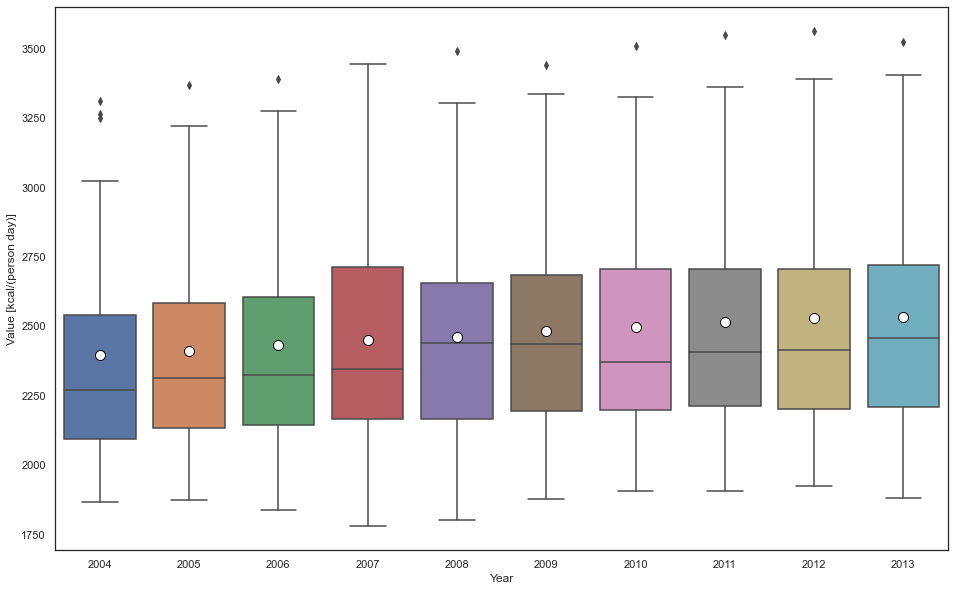

In [157]:
sns.boxplot(x='Year', y='Value [kcal/(person day)]', data=meanSupp_CY, showmeans=True, meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"})
Q1 = meanSupp_CY['Value [kcal/(person day)]'].quantile(0.25)
Q3 = meanSupp_CY['Value [kcal/(person day)]'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 
lower_fence2 = Q1 - 1.5 * (IQR)
upper_fence2 = Q3 + 1.5 * (IQR)
filter = (meanSupp_CY['Value [kcal/(person day)]'] < lower_fence2) | (meanSupp_CY['Value [kcal/(person day)]'] > upper_fence2)
#meanSupp_CY.loc[filter]  

##### Narrative:


### Trend in Food Production for each country over the years

Text(0.5, 1.0, 'Trend in Food Production for each country over the years')

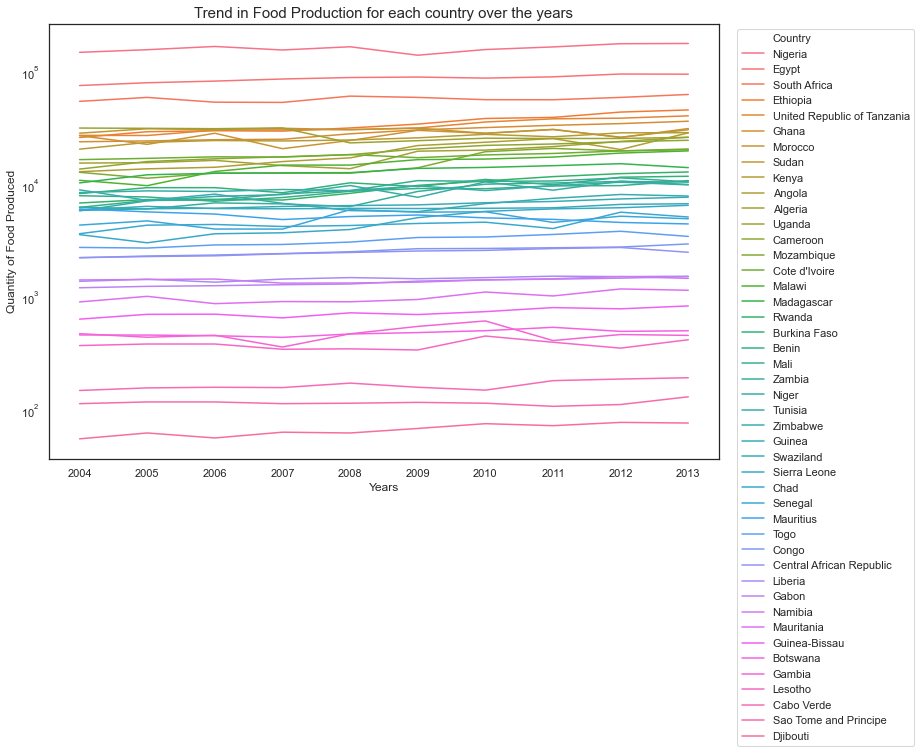

In [158]:
country_ordered = totalProd_CY.sort_values(['Year','Value [kt]'], ascending=False, axis=0)
fig = plt.gcf()
fig.set_size_inches(12, 8)
line_plot = sns.lineplot(x='Year', y='Value [kt]', hue='Country',data=country_ordered )
line_plot.set_yscale('log')
plt.xlabel('Years')
plt.ylabel('Quantity of Food Produced')
line_plot.legend(loc='upper right', bbox_to_anchor=(1.3,1))
plt.title('Trend in Food Production for each country over the years', fontsize=15)

##### Narrative:
Nigeria, Egypt and South Africa maintained first, second and third position 
respectively in the quantity of food produced in Africa while Djibouti, Sao Tome and Principe, 
and Cabo Verde maintained the least, second to the least and third to the least respectively in 
the quantity of food produced in Africa.

### Trend in Food Supply for each country over the years

Text(0.5, 1.0, 'Trend in Food Supply for each country over the years')

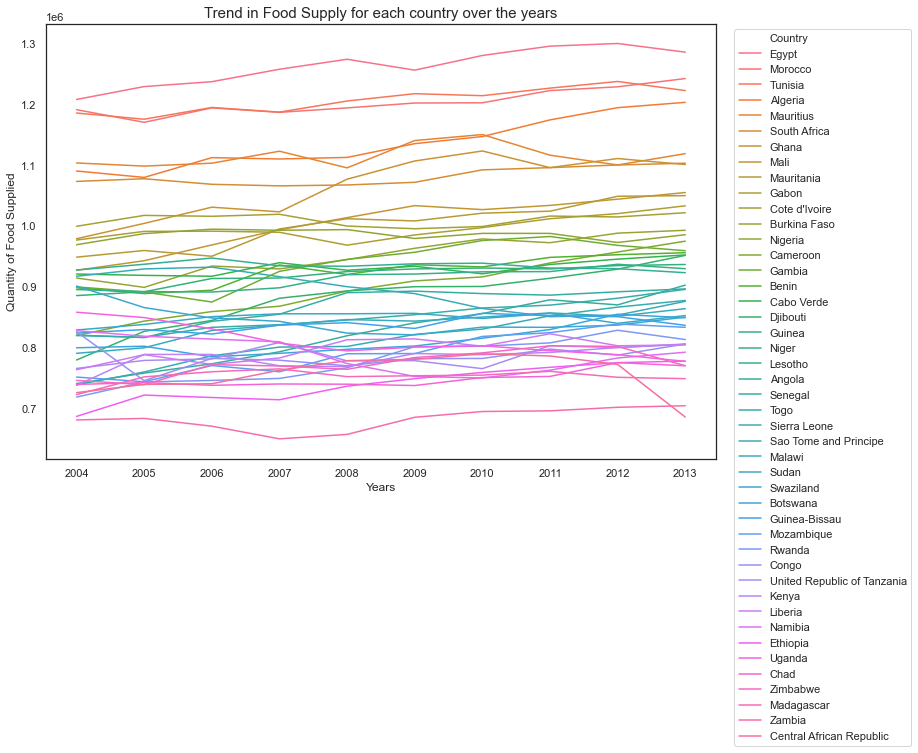

In [159]:
supply_ordered = supply_df.sort_values(['Year','Value [kcal/(person day)]'], ascending=False, axis=0)
#supply_ordered
fig = plt.gcf()
fig.set_size_inches(12, 8)
line_plot = sns.lineplot(x='Year', y='Value [kcal/(person day)]', hue='Country',data=supply_ordered)
#line_plot.set_yscale('log')
plt.xlabel('Years')
plt.ylabel('Quantity of Food Supplied')
line_plot.legend(loc='upper right', bbox_to_anchor=(1.3,1))
plt.title('Trend in Food Supply for each country over the years', fontsize=15)


##### Narrative:
Egypt maintained the top country that supplied the highest quantity of food items across the years 2004 to 2013 while Central African Republic supplied the least in all the years except in 2013 that Zambia was the lowest food supplied country.

### Relationship between the Mean production and Mean population

In [160]:
population_df.head()
meanPop_Y = population_df.groupby(['Year'],as_index=False).mean()
meanPop_C = population_df.groupby(['Country'], as_index=False).mean()
meanPPo_Y = meanProd_Y.merge(meanPop_Y, on='Year')
meanPPo_C = meanProd_C.merge(meanPop_C, on='Country')
meanPPo_C
meanPPo_Y
meanSPo_Y = meanSupp_Y.merge(meanPop_Y, on='Year')
meanSPo_C = meanSupp_C.merge(meanPop_C, on='Country')
meanPSPo_C = meanPPo_C.merge(meanSPo_C, on=['Country','Population'])
meanPSPo_Y = meanPPo_Y.merge(meanSPo_Y, on=['Year','Population'])
px.scatter(meanPPo_Y, x='Value [kt]', y='Population', text='Year')
#meanPSPo_Y

##### Narrative:
An increase in the population approximately brought an increase in the food produced across the years 2004 to 2013.

In [161]:
px.scatter(meanPPo_C, x='Value [kt]', y='Population', text='Country')

##### Narrative:
Nigeria is the country with the most population and produced most quantities of food items in Africa.

### Relationship between the Mean consumption and Mean population

In [162]:
px.scatter(meanSPo_Y, x='Value [kcal/(person day)]', y='Population', text='Year')

##### Narrative:
An increase in the population approximately brought an increase in the food supplied across the years 2004 to 2013.

In [163]:
px.scatter(meanSPo_C, x='Value [kcal/(person day)]', y='Population', text='Country')


##### Narrative:

### Average Food Production by Country

In [164]:
from plotly.offline import plot
fig = px.scatter(meanProd_C, x='Country', y='Value [kt]', title ='AVERAGE FOOD PRODUCTION BY COUNTRY',text='Country')
#add two horizontal lines
fig.update_layout(width=1000, height=900, autosize=False, shapes=[
    #lower fence
    dict(type='line', xref='paper', x0=0, x1=1, yref='y', y0=lower_fence, y1=lower_fence, line=dict(
    color='Red', width=1)),
    #mean
    dict(type='line', xref='paper', x0=0, x1=1, yref='y', y0=meanProd_C['Value [kt]'].mean(), y1=meanProd_C['Value [kt]'].mean(), line=dict(
    color='Orange', width=1)),
    #median
    dict(type='line', xref='paper', x0=0, x1=1, yref='y', y0=meanProd_C['Value [kt]'].median(), y1=meanProd_C['Value [kt]'].median(), line=dict(
    color='Blue', width=1)),
    #upper fence
    dict(type='line', xref='paper', x0=0, x1=1, yref='y', y0=upper_fence, y1=upper_fence, line=dict(
    color='Green', width=1))], showlegend=False)

fig.update_traces(textposition='top center')
fig.update_xaxes(showticklabels= False)

fig

##### Narratives:
Nigeria, Egypt and South Africa produced extremely high quantities of food items above other countries in Africa.

### Average Food Supply by Country

In [165]:
from plotly.offline import plot
fig = px.scatter(meanSupp_C, x='Country', y='Value [kcal/(person day)]', title ='AVERAGE FOOD SUPPLY BY COUNTRY',text='Country')
#add two horizontal lines
fig.update_layout(width=1000, height=900, autosize=False, shapes=[
    #lower fence
    dict(type='line', xref='paper', x0=0, x1=1, yref='y', y0=lower_fence2, y1=lower_fence2, line=dict(
    color='Red', width=1)),
    #mean
    dict(type='line', xref='paper', x0=0, x1=1, yref='y', y0=meanSupp_C['Value [kcal/(person day)]'].mean(), y1=meanSupp_C['Value [kcal/(person day)]'].mean(), line=dict(
    color='Orange', width=1)),
    #median
    dict(type='line', xref='paper', x0=0, x1=1, yref='y', y0=meanSupp_C['Value [kcal/(person day)]'].median(), y1=meanSupp_C['Value [kcal/(person day)]'].median(), line=dict(
    color='Blue', width=1)),
    #upper fence
    dict(type='line', xref='paper', x0=0, x1=1, yref='y', y0=upper_fence2, y1=upper_fence2, line=dict(
    color='Green', width=1))], showlegend=False)

fig.update_traces(textposition='top center')
fig.update_xaxes(showticklabels= False)

fig

##### Narratives:
Only Egypt supplied extremely high quantities of food between 2004 to 2013 above other countries in Africa.

### Map showing the quantity of food items produced in African countries

In [166]:
country_code = population_df.drop(['Population','Year'], axis=1)
country_code.head()
country_code = country_code.drop_duplicates(subset='Country',keep='first')
country_code['Country'] = country_code['Country'].replace(['Congo, Dem. Rep.','Egypt, Arab Rep.','Eswatini','Gambia, The','Tanzania'],['Congo','Egypt','Swaziland','Gambia','United Republic of Tanzania'])
country_code
production_map = totalProd_CY
production_map['Year'] = production_map['Year'].astype(str)
totalProd_CCo = production_map.merge(country_code, on='Country', how='right')
totalProd_CCo.head()
px.choropleth(totalProd_CCo, locations='Code',hover_name='Country', title = 'Food Production in Africa (2004-2013)', 
                   color='Value [kt]',labels={'Value [kt]':'Quantity'}, scope='africa',
                    color_continuous_scale=px.colors.sequential.Plasma, animation_frame='Year') 

##### Narrative:
From the map, it is obvious that Nigeria produced the most food items followed by 
Egypt and then South Africa. Other countries produced food in low quantities compared to 
Nigeria.

### Map showing the quantity of food items supplied in African countries

In [167]:
supply_map = supply_df
supply_map['Year'] = supply_map['Year'].astype(str)
totalSupp_CCo = supply_map.merge(country_code, on='Country', how='right')
totalSupp_CCo.head()
px.choropleth(totalSupp_CCo, locations='Code',hover_name='Country', title = 'Food Supply in Africa (2004-2013)', 
                   color='Value [kcal/(person day)]',labels={'Value [kcal/(person day)]':'Quantity'}, scope='africa',
                    color_continuous_scale=px.colors.sequential.Plasma, animation_frame='Year') 

##### Narrative:
Egypt, Morocco and Tunisia supplied the highest quantity of food items in Africa.

### Map showing the cassava produced in the African countries between 2004 to 2013

In [168]:
cassava_prod = production_df.loc[production_df['Item'] == 'Cassava and products', ['Country','Year','Value [kt]']]
cassava_prod.head()
cassava_map = cassava_prod
cassava_map['Year'] = cassava_map['Year'].astype(str)
cassava_map = cassava_map.merge(country_code, on='Country', how='right')
cassava_map.head()
px.choropleth(cassava_map, locations='Code',hover_name='Country', title = 'Cassava Food Production in Africa (2004-2013)', 
                   color='Value [kt]',labels={'Value [kt]':'Quantity'}, scope='africa',
                    color_continuous_scale=px.colors.sequential.Plasma, animation_frame='Year') 

##### Narrative: 
 Not all African countries produce Cassava although it is the food item with the 
highest quantity of food production. Nigeria produces the highest quantity of cassava.

### Nigeria data

In [169]:
nigeria_data = production_df.loc[production_df['Country'] == 'Nigeria', ['Country','Item','Year','Value [kt]']]

No handles with labels found to put in legend.


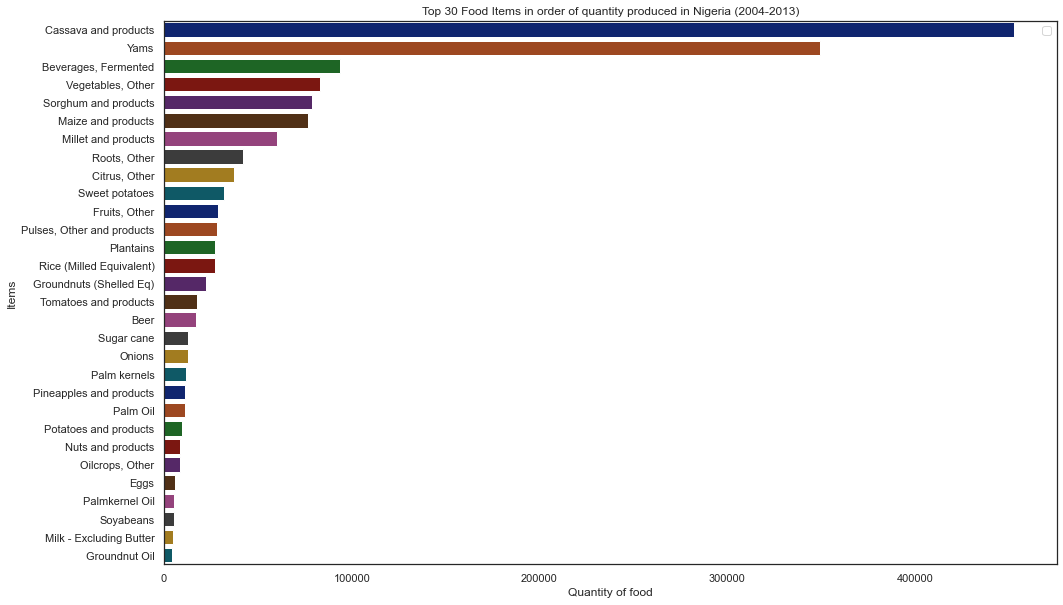

In [170]:
nigerian_food = nigeria_data.groupby('Item').sum()
nigerian_food = nigerian_food.sort_values('Value [kt]', ascending=False).head(30)
sns.barplot(x=nigerian_food['Value [kt]'], y=nigerian_food.index, data=nigerian_food, palette='dark')
plt.ylabel('Items')
plt.xlabel('Quantity of food')
#plt.rcParams['figure.figsize'] = (20, 10)
plt.title('Top 30 Food Items in order of quantity produced in Nigeria (2004-2013)')
plt.legend()
plt.show()

###### Narrative:
Cassava, Yams and Beverages were the items produced most in Nigeria between 2004 to 2013.

No handles with labels found to put in legend.


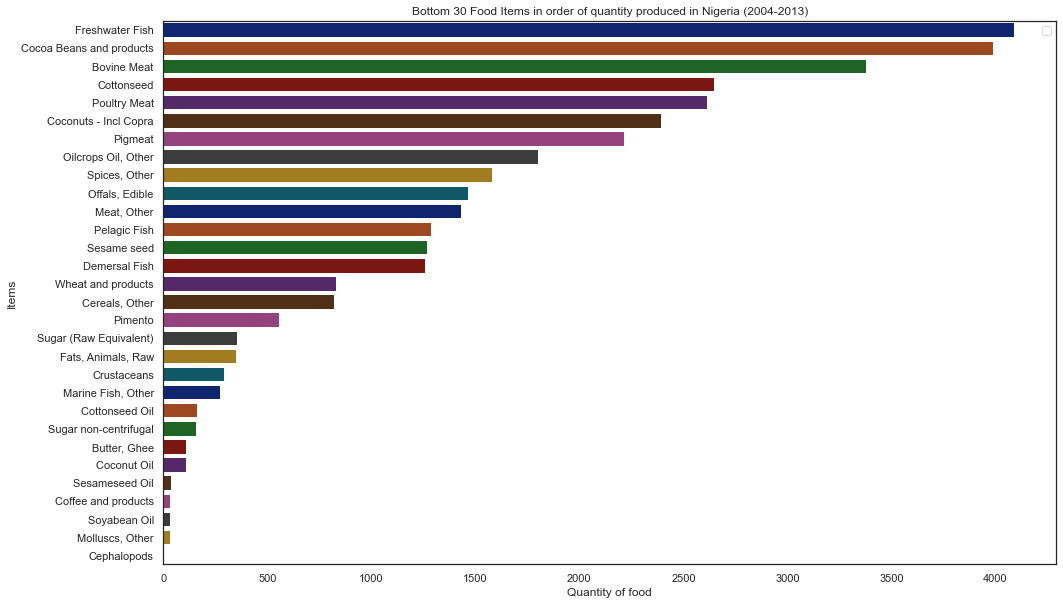

In [171]:
nigerian_food = nigeria_data.groupby('Item').sum()
nigerian_food = nigerian_food.sort_values('Value [kt]', ascending=False).tail(30)
sns.barplot(x=nigerian_food['Value [kt]'], y=nigerian_food.index, data=nigerian_food, palette='dark')
plt.ylabel('Items')
plt.xlabel('Quantity of food')
#plt.rcParams['figure.figsize'] = (20, 10)
plt.title('Bottom 30 Food Items in order of quantity produced in Nigeria (2004-2013)')
plt.legend()
plt.show()

##### Narrative:
Cephalopods, Molluscs and Soyabean oil were the least produced food items in Nigeria between 2004 to 2013.

In [172]:
nigeria = production_df.loc[production_df['Country'] == 'Nigeria',['Country','Item','Year','Value [kt]']]
nigeria.head()
totalQ_nigeria = nigeria.groupby('Country',as_index=False).sum()
totalQ_nigeria
nigeriaS_df = supply_df.loc[supply_df['Country'] == 'Nigeria',['Country','Year','Value [kcal/(person day)]']]
nigeriaS_df =nigeriaS_df.groupby('Country', as_index=False).sum()
nigeria_data = totalQ_nigeria.merge(nigeriaS_df, on='Country')
nigeria_data

,Country,Value [kt],Value [kcal/(person day)]
0,Nigeria,1628030,9850620


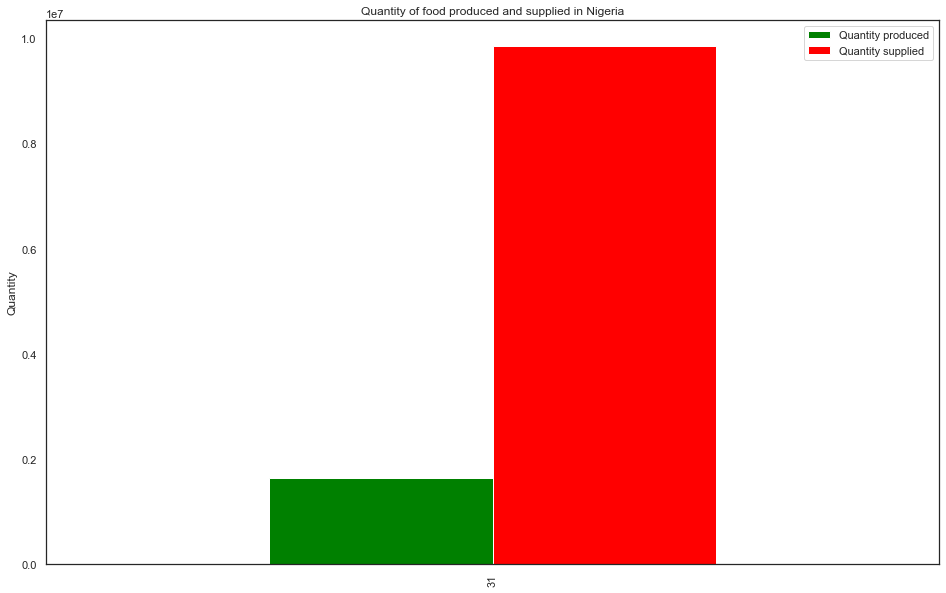

In [173]:
#sns.barplot(x=nigeria_df.index, y=['Quantity produced','Quantity supplied'], data=nigeria_df, palette='dark')
nigeria_df.reset_index()
nigeria_df.plot(kind='bar', color=['green','red'])
#plt.label('Nigeria', rotation=0)
plt.ylabel('Quantity')
plt.rcParams['figure.figsize'] = (10, 5)
plt.title('Quantity of food produced and supplied in Nigeria')
plt.legend()
plt.show()

##### Narrative:
The quantity supplied in Nigeria is much higher than the quantity produced between 2004 to 2013. This indicates that more food was imported to the country than what was produced between these years.

In [174]:
percent_supplied =(nigeria_df['Quantity supplied'] - nigeria_df['Quantity produced'])/ nigeria_df['Quantity supplied']

In [175]:
percent_supplied * 100 

31    83.472817
dtype: float64

### Egypt data

In [176]:
egypt_df = production_df.loc[production_df['Country'] == 'Egypt',['Country','Item','Year','Value [kt]']]
egypt_df.head()
totalQ_egypt = egypt_df.groupby('Country',as_index=False).sum()
totalQ_egypt
egyptS_df = newsupply_df.loc[newsupply_df['Country'] == 'Egypt',['Country','Year','Value [kcal/(person day)]']]
egyptS_df =egyptS_df.groupby('Country', as_index=False).sum()
eypyt_Quantity = totalQ_egypt.merge(egyptS_df, on='Country')
eypyt_Quantity

,Country,Value [kt],Value [kcal/(person day)]
0,Egypt,877498,12621700


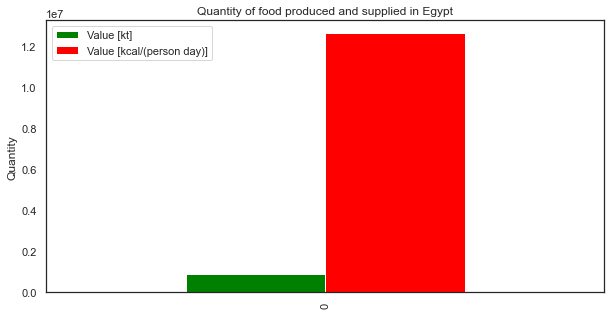

In [177]:
#sns.barplot(x=nigeria_df.index, y=['Quantity produced','Quantity supplied'], data=nigeria_df, palette='dark')
eypyt_Quantity.reset_index()
eypyt_Quantity.plot(kind='bar', color=['green','red'])
#plt.label('Nigeria', rotation=0)
plt.ylabel('Quantity')
#plt.rcParams['figure.figsize'] = (10, 5)
plt.title('Quantity of food produced and supplied in Egypt')
plt.legend()
plt.show()

##### Narrative:
The quantity of food items supplied in Egypt between the years 2004 to 2013  is extremely higher than the quantity produced. This indicates that a lot of food that is consumed in Egypt were imported from other countries.

---

## Conclusion and Recommendation:

Majority of these African countries rely on imported food items from other countries in the world. There can be shortage od food because the food produced is extremely low compared to the food consumed by people in the African countries between the years 2004 to 2013. 

###### Suggestion:
More food items need to be produced in African countries to sustain the population

